**3.- Kernel SVM – Dígitos escritos a mano**

**Ejecute el SVM Kernel con 3 funciones Kernel diferentes use Gaussian (RBF), polynomial (con grado 2 hasta 8), y sigmoide.** 

**¿Cual trabaja mejor para el dataset de dígitos escritos a mano? Justifique**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [0]:
digits=load_digits()
X=digits.data
Y=digits.target
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.37)
scaler = MinMaxScaler()
xTrain=scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

In [0]:
def evaluateModel(kernels,degree=[2]):
  parameters = [{'gamma':[0.1,0.5,2,5,10,50,100,150],
               'C':[0.5,1,2,5,10,50,100,150,200],
               'kernel':kernels,
               'degree':degree}]
  svc = SVC()
  grid_search = GridSearchCV(estimator = svc, param_grid = parameters, cv= 5, n_jobs = -1, scoring = 'accuracy')
  grid_search.fit(xTrain,yTrain)
  print("Best Parameters: ", grid_search.best_params_)
  print("Best Scoring: {:.2f}".format(grid_search.best_score_))
  print("Training accuracy: {:.2f}".format(grid_search.score(xTrain,yTrain)))
  print("Test accuracy: {:.2f}".format(grid_search.score(xTest,yTest)))
  pred=grid_search.predict(xTest)
  mat = confusion_matrix(yTest, pred)
  sns.heatmap(mat.T, square=True, annot=True, cbar=False)
  plt.xlabel('valor verdadero')
  plt.ylabel('valor predicho')
  print("\n\nClassification Report")
  print(classification_report(yTest,pred))

  return grid_search

**Gaussian(RBF)**

---



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters:  {'C': 5, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best Scoring: 0.99
Training accuracy: 1.00
Test accuracy: 0.98


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      0.99      0.99        81
           2       1.00      1.00      1.00        72
           3       0.97      0.99      0.98        76
           4       1.00      0.95      0.98        64
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        67
           7       1.00      1.00      1.00        64
           8       0.95      1.00      0.97        58
           9       0.95      0.92      0.94        64

    accuracy                           0.98       665
   macro avg       0.98      0.98      0.98       665
weighted avg       0.99      0.98      0.98       665



SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

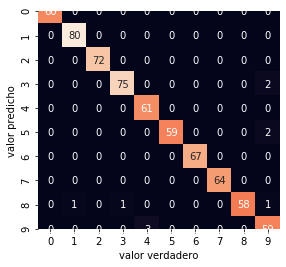

In [107]:
evaluateModel(['rbf'])

**Polynomial (con grado 2 hasta 8)**

---



Best Parameters:  {'C': 0.5, 'degree': 3, 'gamma': 0.5, 'kernel': 'poly'}
Best Scoring: 0.99
Training accuracy: 1.00
Test accuracy: 0.98


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.99      0.98      0.98        81
           2       1.00      1.00      1.00        72
           3       0.96      0.99      0.97        76
           4       1.00      0.95      0.98        64
           5       0.97      0.98      0.97        59
           6       1.00      0.97      0.98        67
           7       1.00      1.00      1.00        64
           8       0.92      1.00      0.96        58
           9       0.93      0.89      0.91        64

    accuracy                           0.98       665
   macro avg       0.98      0.98      0.98       665
weighted avg       0.98      0.98      0.98       665



SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

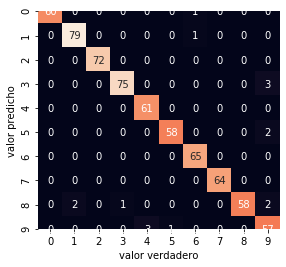

In [108]:
evaluateModel(['poly'],[2,3,4,5,6,7,8])

**Sigmoide**

---



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters:  {'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'sigmoid'}
Best Scoring: 0.93
Training accuracy: 0.93
Test accuracy: 0.92


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.85      0.81      0.83        81
           2       0.99      0.93      0.96        72
           3       0.99      0.92      0.95        76
           4       0.97      0.91      0.94        64
           5       0.94      0.98      0.96        59
           6       0.97      0.97      0.97        67
           7       0.88      0.98      0.93        64
           8       0.80      0.84      0.82        58
           9       0.82      0.84      0.83        64

    accuracy                           0.92       665
   macro avg       0.92      0.92      0.92       665
weighted avg       0.92      0.92      0.92       665



SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

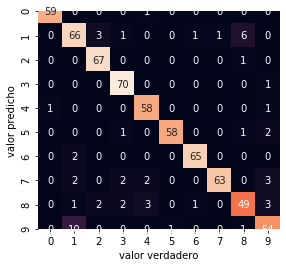

In [109]:
evaluateModel(['sigmoid'])

**BEST KERNEL FUNCTION**

---



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters:  {'C': 5, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best Scoring: 0.99
Training accuracy: 1.00
Test accuracy: 0.98


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      0.99      0.99        81
           2       1.00      1.00      1.00        72
           3       0.97      0.99      0.98        76
           4       1.00      0.95      0.98        64
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        67
           7       1.00      1.00      1.00        64
           8       0.95      1.00      0.97        58
           9       0.95      0.92      0.94        64

    accuracy                           0.98       665
   macro avg       0.98      0.98      0.98       665
weighted avg       0.99      0.98      0.98       665



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511
mean_fit_time,0.08051,0.127716,0.0485189,0.160385,0.24191,0.0397291,0.249552,0.210665,0.0392501,0.259911,0.184185,0.040353,0.309912,0.180517,0.0407595,0.273661,0.180554,0.040892,0.278343,0.180672,0.0405035,0.262573,0.18207,0.0389791,0.0787004,0.128454,0.0473675,0.158996,0.245304,0.0419023,0.247811,0.219463,0.0440679,0.259511,0.184514,0.0424414,0.308404,0.177633,0.0414329,0.273915,...,0.0441201,0.278229,0.184793,0.0453199,0.360151,0.182918,0.0452334,0.295437,0.178707,0.0450463,0.285064,0.180815,0.0441853,0.277891,0.182059,0.0472648,0.0593693,0.033559,0.0463923,0.186824,0.17507,0.0482654,0.27502,0.216599,0.0458601,0.274786,0.176861,0.0452286,0.358074,0.178945,0.0453769,0.29472,0.178148,0.0472011,0.290712,0.180222,0.0449184,0.273942,0.180084,0.0440467
std_fit_time,0.00228746,0.00172782,0.00206192,0.00462685,0.00274545,0.00213654,0.00510073,0.00273125,0.00200311,0.00628549,0.00600199,0.000832807,0.00598258,0.006447,0.00162397,0.00553703,0.0040513,0.00176013,0.0163929,0.00357055,0.00209042,0.00423536,0.00338601,0.000525221,0.00119706,0.00106664,0.00349209,0.0051448,0.00478376,0.00151859,0.0071813,0.0113174,0.0016423,0.00271081,0.00613263,0.00150126,0.00864369,0.00439017,0.000896981,0.00731091,...,0.000656745,0.00326626,0.00393745,0.00219506,0.0087764,0.00975862,0.00166882,0.00478364,0.00298136,0.00215338,0.00546225,0.00549662,0.000545029,0.00421561,0.00398848,0.0031447,0.00311059,0.00100248,0.00143512,0.00399075,0.00256058,0.00216348,0.0196665,0.00950497,0.00159086,0.00389657,0.0032229,0.00216332,0.00514437,0.00836242,0.000574969,0.00571492,0.00412369,0.00219398,0.00462954,0.00495316,0.000460565,0.00425481,0.00325406,0.00595345
mean_score_time,0.0226097,0.0299143,0.013898,0.0251594,0.0328101,0.0105674,0.0335656,0.0317388,0.0112678,0.0340508,0.0246873,0.0107331,0.0333607,0.0243567,0.0107779,0.0376558,0.0244776,0.0107661,0.0387435,0.0247227,0.0118983,0.0338961,0.0245457,0.0107413,0.0218824,0.0310306,0.0119064,0.0240419,0.0334598,0.0102259,0.0355303,0.0322293,0.0105804,0.0338575,0.0255532,0.0109226,0.0339131,0.0243024,0.0104649,0.0382147,...,0.00836611,0.0339553,0.0245135,0.00828524,0.03323,0.0243765,0.00823693,0.0391574,0.0243093,0.00906954,0.0377319,0.025002,0.00838366,0.0327323,0.0245474,0.00828085,0.0172023,0.0108153,0.00812664,0.0246829,0.0343532,0.0100886,0.034193,0.0306561,0.00798483,0.033761,0.0247247,0.008249,0.033134,0.0242454,0.00827599,0.0372773,0.0243799,0.0080802,0.0378338,0.0244427,0.00800719,0.0329179,0.0246762,0.00742798
std_score_time,0.00143206,0.000368687,0.00044054,0.00189903,0.000437638,6.70037e-05,0.000269969,0.00165024,0.000515902,0.00039288,0.000264237,0.000277015,0.000684192,0.000228961,0.000200098,0.000486484,0.000272654,0.000198527,0.00128725,0.000256035,0.00182222,0.00107199,0.000308466,0.000263851,0.000346362,0.00258282,0.000954061,0.00024019,0.00146903,0.000240615,0.00224713,0.00241418,0.000282115,0.000374391,0.0019232,0.000935458,0.000640162,0.000169523,0.000174551,0.00155992,...,0.000189833,0.000444358,0.000173587,0.00033262,0.000847388,0.000368838,0.000224953,0.0025088,0.000203088,0.00163625,0.000261321,0.00138136,0.000175476,0.000273448,0.00011435,0.000216343,0.000425374,0.000491382,0.000407719,0.00197571,0.00708825,0.00408978,0.00115138,0.000439603,0.000197547,0.000283681,0.00062582,0.000431398,0.000858732,0.000355272,0.000412839,0.000518549,0.000143153,0.00023194,0.000424504,0.00022504,0.000238976,0.000214532,0.000362925,0.00120019
param_C,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,20

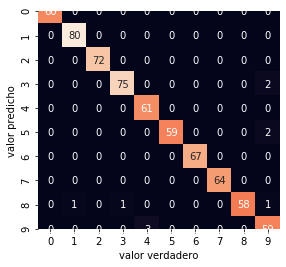

In [114]:
grid_search = evaluateModel(['rbf','sigmoid','poly'],[2,3,4,5,6,7,8])
results=pd.DataFrame(grid_search.cv_results_)
display(results.T)